In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
file_path = '/content/drive/MyDrive/tourist_final_data.csv'
df = pd.read_csv(file_path)

In [4]:
total_visitors_per_year = df.groupby('year')['visitors'].sum().reset_index()
print("Total Visitors (2016-2019):")
print(total_visitors_per_year)

Total Visitors (2016-2019):
   year  visitors
0  2016  95327400
1  2017  85518442
2  2018  93196483
3  2019  83359220


In [5]:
start_visitors_2019 = total_visitors_per_year.loc[total_visitors_per_year['year'] == 2019, 'visitors'].values[0]

In [7]:
years_2020_2024 = list(range(2020, 2025))
predicted_visitors_2020_2024 = []

for year in years_2020_2024:
    if year == 2020:
        visitors = start_visitors_2019 * 0.4  # 60% drop
    elif year == 2021:
        visitors = predicted_visitors_2020_2024[-1] * 1.05  # 5% increase
    elif year == 2022:
        visitors = start_visitors_2019 * 0.95  # 95% of 2019
    elif year == 2023:
        visitors = predicted_visitors_2020_2024[-1] * 1.05  # 5% increase
    elif year == 2024:
        visitors = predicted_visitors_2020_2024[-1] * 1.07  # 7% increase
    predicted_visitors_2020_2024.append(int(visitors))

In [8]:
years_2025_2030 = list(range(2025, 2031))
predicted_visitors_2025_2030 = []

last_visitor_2024 = predicted_visitors_2020_2024[-1]

for year in years_2025_2030:
    growth_rate = np.random.uniform(0.02, 0.03)
    visitors = last_visitor_2024 * (1 + growth_rate)
    predicted_visitors_2025_2030.append(int(visitors))
    last_visitor_2024 = visitors

In [9]:
future_2020_2024_df = pd.DataFrame({
    'year': years_2020_2024,
    'total_visitors': predicted_visitors_2020_2024
})

future_2025_2030_df = pd.DataFrame({
    'year': years_2025_2030,
    'total_visitors': predicted_visitors_2025_2030
})


combined_df = pd.concat([
    total_visitors_per_year.rename(columns={'visitors': 'total_visitors'}),
    future_2020_2024_df,
    future_2025_2030_df
])

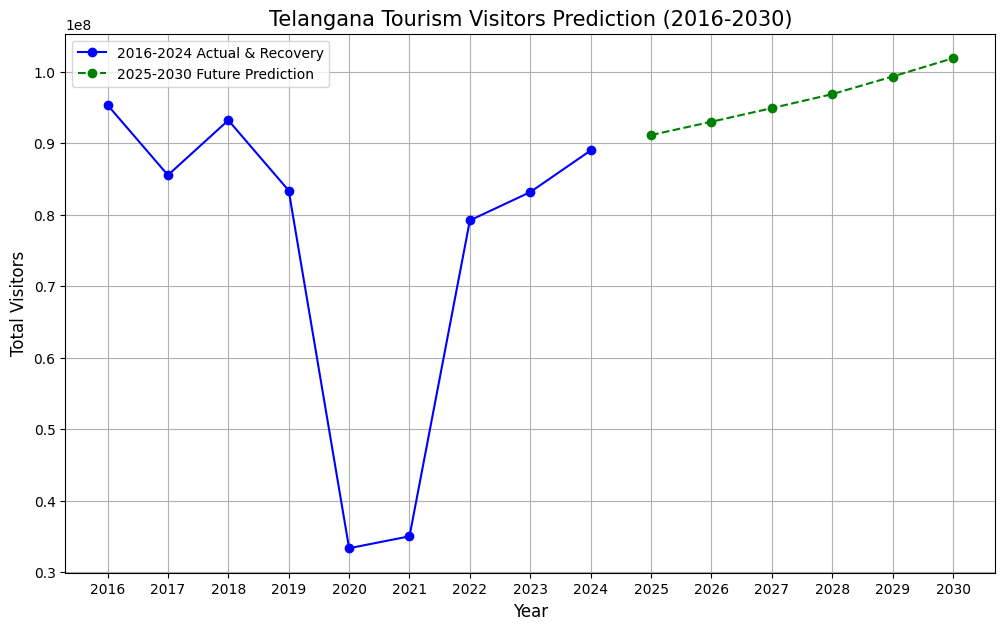

In [10]:
plt.figure(figsize=(12,7))

mask_1 = combined_df['year'] <= 2024
plt.plot(combined_df[mask_1]['year'], combined_df[mask_1]['total_visitors'],
         marker='o', linestyle='-', color='blue', label='2016-2024 Actual & Recovery')


mask_2 = combined_df['year'] >= 2025
plt.plot(combined_df[mask_2]['year'], combined_df[mask_2]['total_visitors'],
         marker='o', linestyle='--', color='green', label='2025-2030 Future Prediction')

plt.title('Telangana Tourism Visitors Prediction (2016-2030)', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Visitors', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(combined_df['year'])
plt.show()

In [11]:
print("\nPredicted Visitors for 2025-2030:")
print(future_2025_2030_df)



Predicted Visitors for 2025-2030:
   year  total_visitors
0  2025        91125304
1  2026        92986508
2  2027        94890757
3  2028        96846011
4  2029        99311337
5  2030       101869644
